In [218]:
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sns
import numpy as np

In [219]:
data=pd.read_csv(r'C:\Users\thesu\OneDrive\Documents\water_potability.csv')

In [220]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [221]:
data.head

<bound method NDFrame.head of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135  

# Data Cleaning

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [223]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [224]:
# Here, we see that the median for Potability 1 and 0 are both, we can fill the missing values with the median

data[data['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()
data[data['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()
data['ph'].fillna(value=data['ph'].median(),inplace=True)
data['Sulfate'].fillna(value=data['Sulfate'].median(),inplace=True)
data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median(),inplace=True)

In [225]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [226]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


# Exploratory Data Analysis

In [227]:
data.shape

(3276, 10)

In [228]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### IQR

In [229]:
def single_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

In [230]:
IQR = pd.DataFrame(data)
IQR.apply(single_iqr)

ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64

##### Cat Frequency 

In [231]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

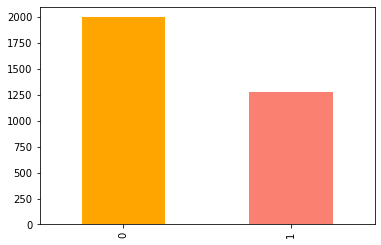

In [232]:
data.Potability.value_counts().plot(kind="bar", color=["orange", "salmon"])
mplt.show()

In [233]:
zero  = data[data['Potability']==0]   #zero values in Potability column
one = data[data['Potability']==1]  # one values in Potability column
from sklearn.utils import resample
#minority class that  is 1, we need to upsample/increase that class so that there is no bias
#n_samples = 1998 means we want 1998 sample of class 1, since there are 1998 samples of class 0
df_minority_upsampled = resample(one, replace = True, n_samples = 1998) 
#concatenate
data = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
data = shuffle(data) # shuffling so that there is particular sequence

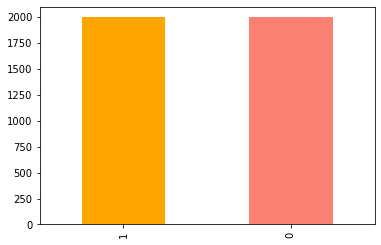

In [234]:
data.Potability.value_counts().plot(kind="bar", color=["orange", "salmon"])
mplt.show()

In [235]:
data.Potability.value_counts()

1    1998
0    1998
Name: Potability, dtype: int64

<AxesSubplot:>

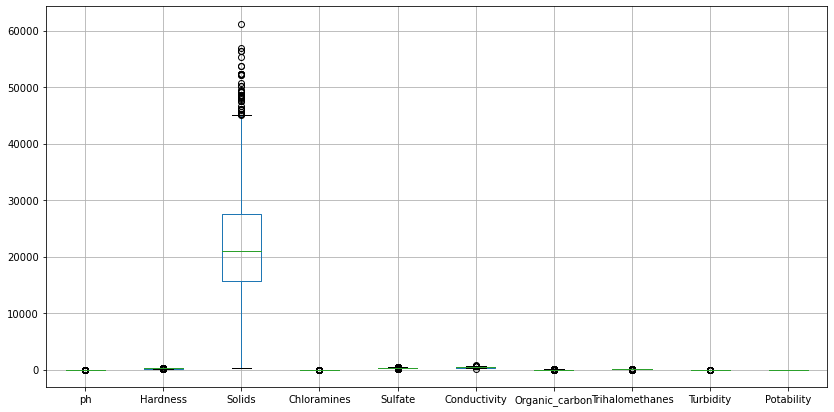

In [236]:
data.boxplot(figsize=(14,7))

#### Histogram

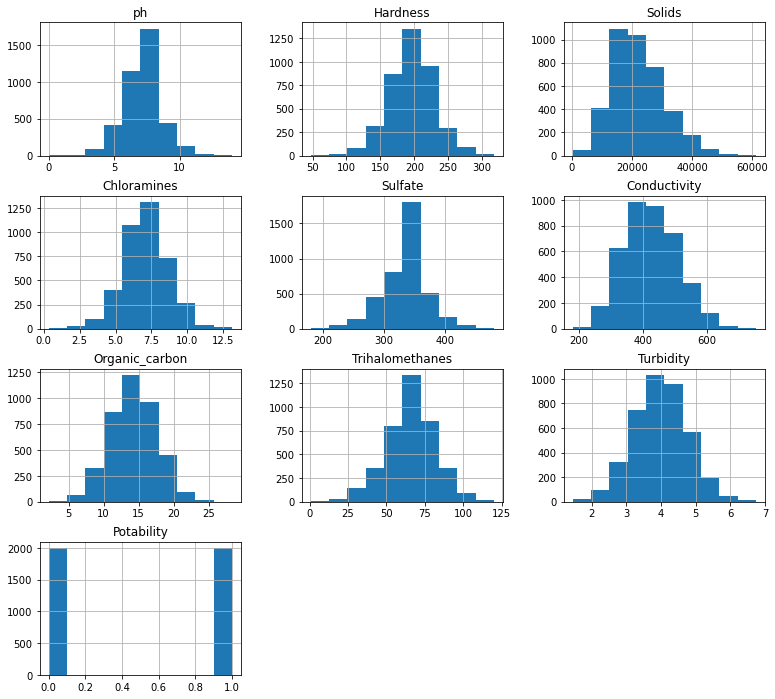

In [237]:
data.hist(figsize=(13,12))
mplt.show()

#### Visualizing with pairplot

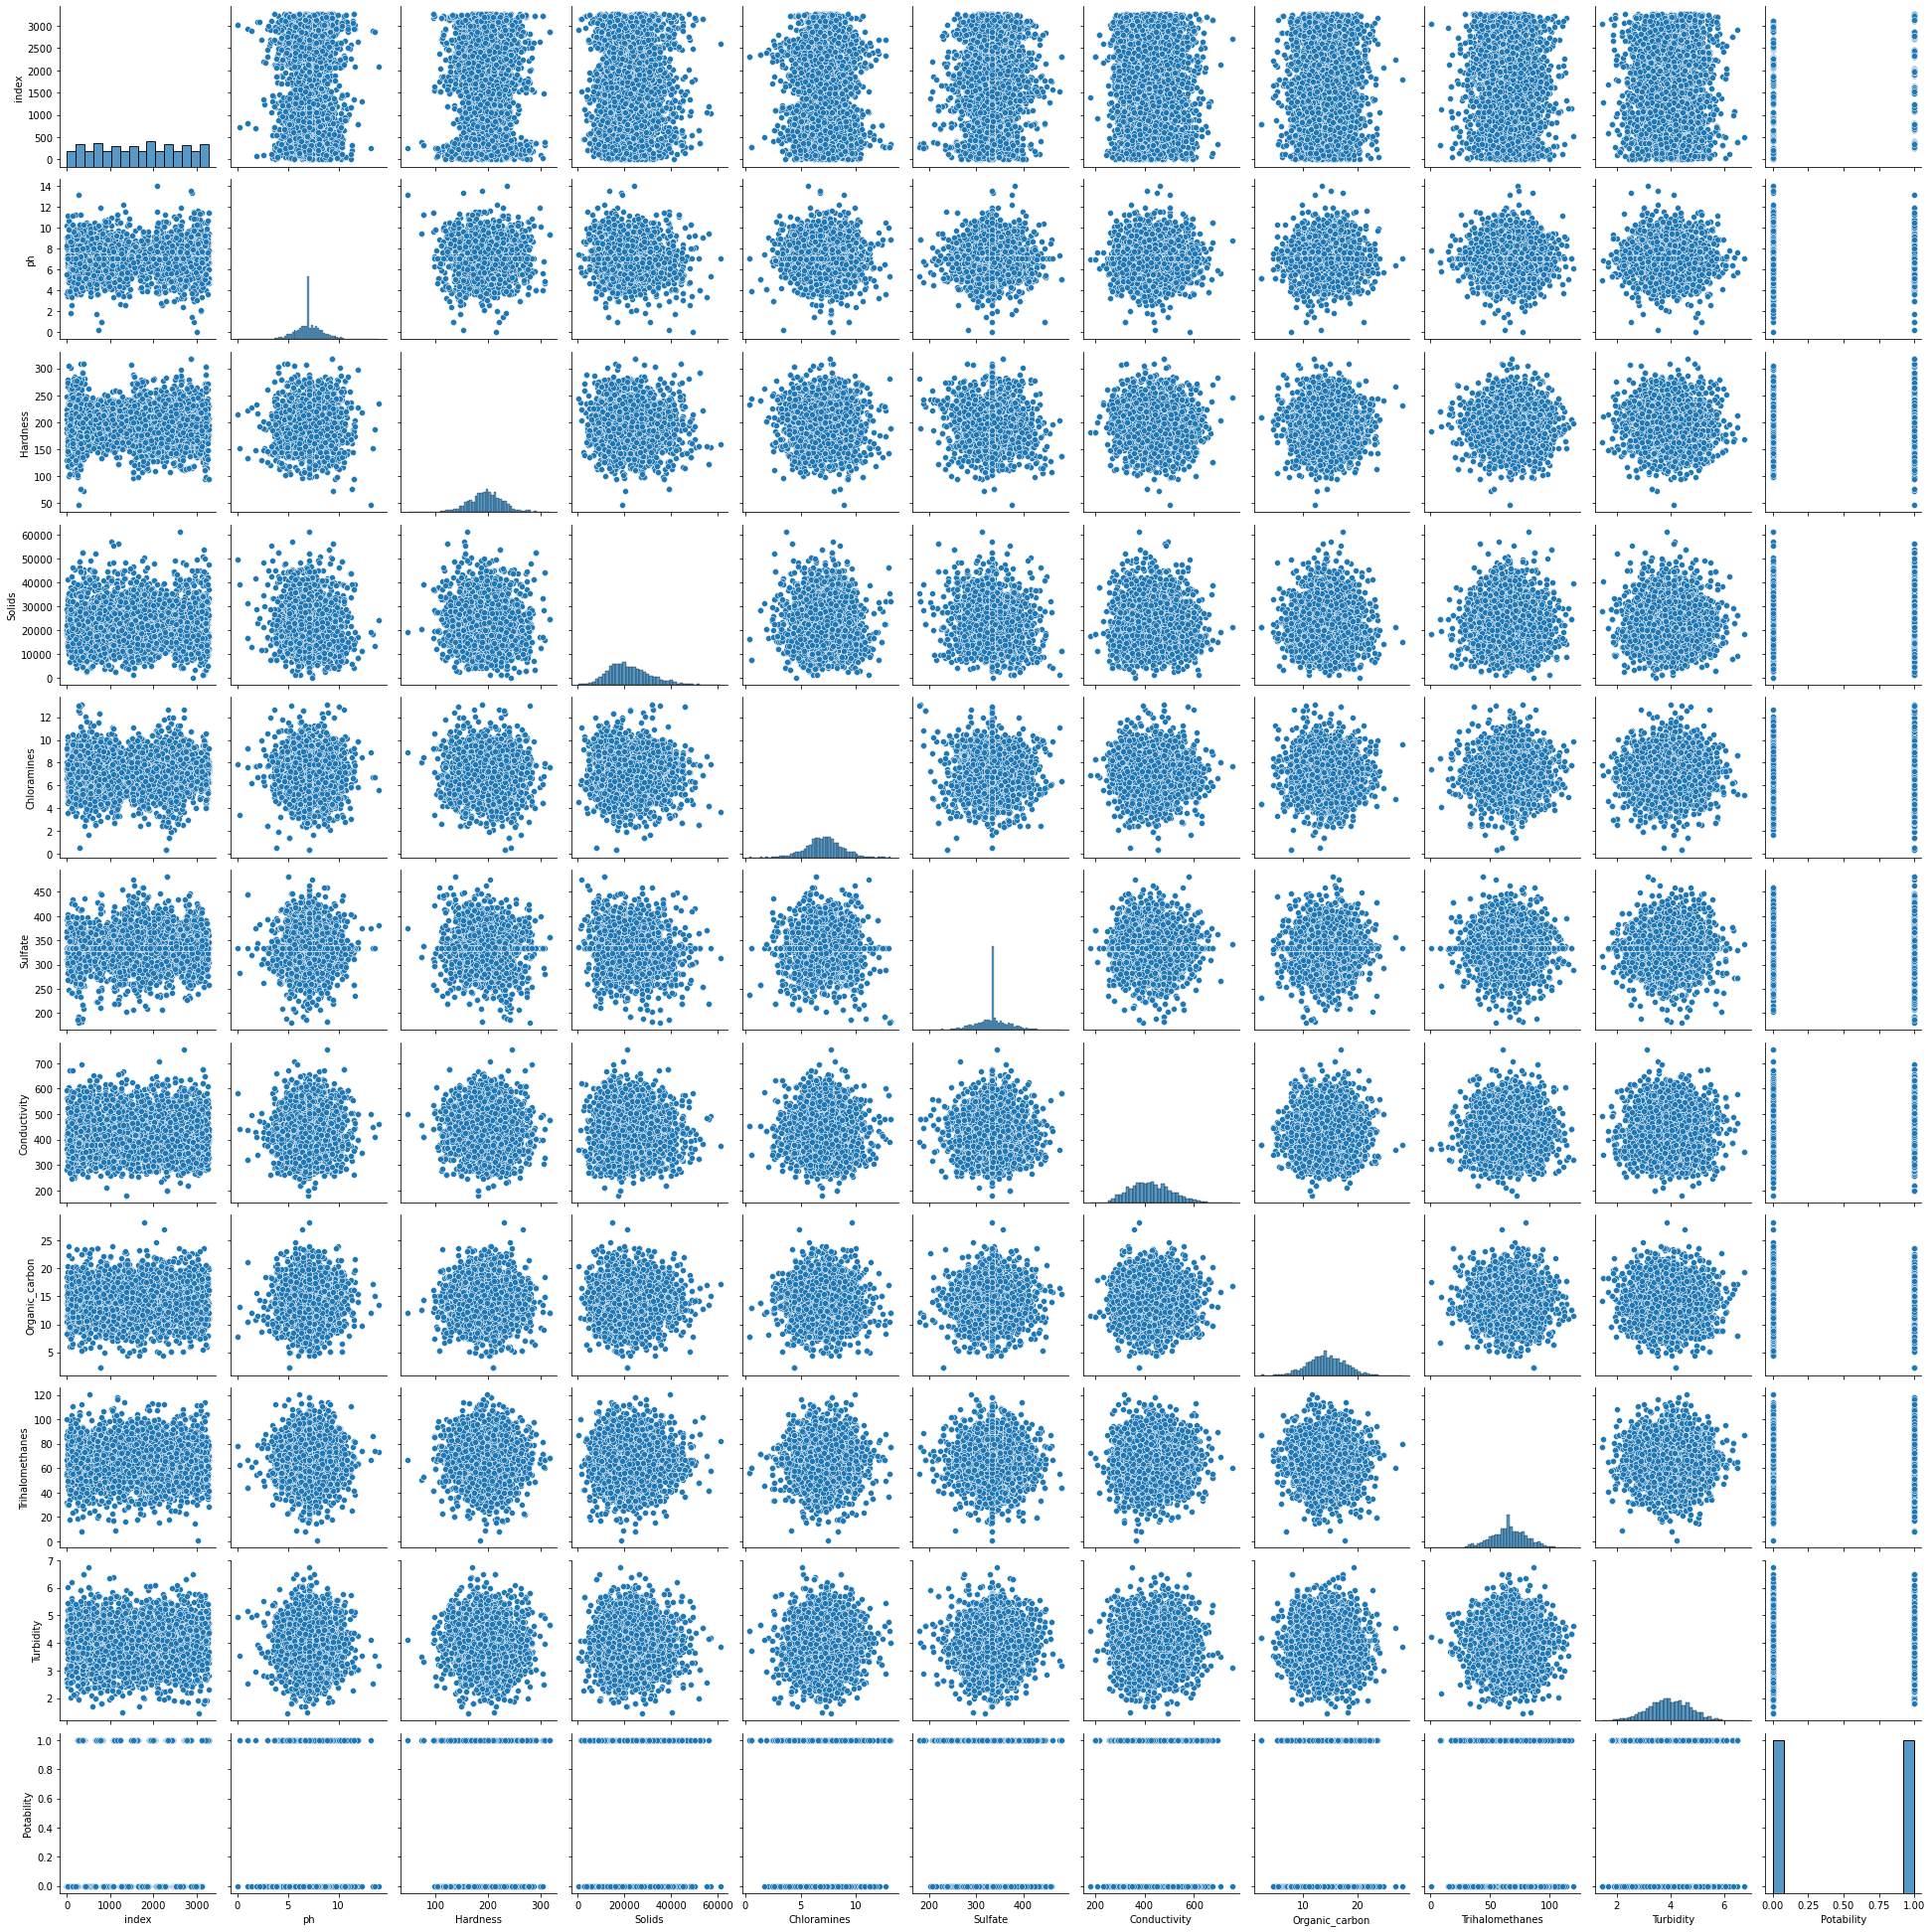

In [238]:
data.reset_index(inplace=True)
sns.pairplot(data)
mplt.show()

#### Correlation Matrix

In [239]:
size = 10

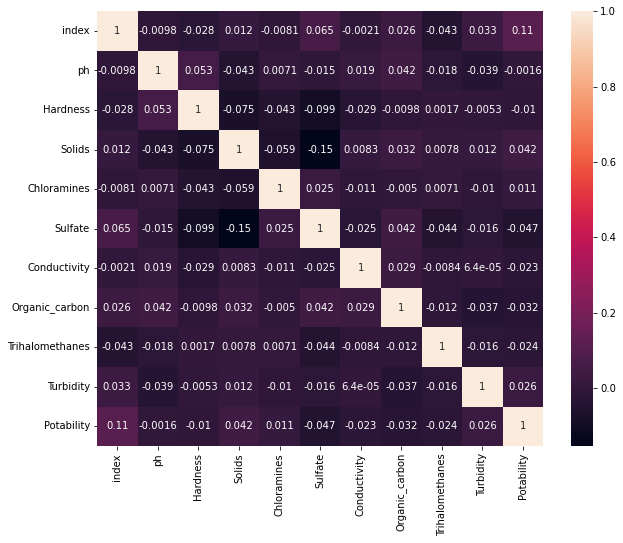

In [240]:
df = pd.DataFrame(data)
 
corrM = df.corr()
sns.heatmap(corrM, annot=True)
figure = mplt.gcf()
figure.set_size_inches(10,8)

mplt.show()

#### Stratified Sampling

In [241]:
data.groupby('Potability', group_keys=False).apply(lambda x: x.sample(int(np.rint(size*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,2636,4.704184,169.943914,7028.839617,8.987043,317.829814,289.537529,8.069436,63.664949,4.138994,0
1,2629,5.720136,182.440160,13463.852419,8.253966,333.073546,401.509481,13.361778,52.952904,3.513255,0
2,404,8.029182,158.040398,19663.469428,8.433448,283.270495,431.304716,20.696198,59.972929,4.388551,1
3,3170,6.985304,219.586440,16470.952192,6.445513,339.053992,492.903021,15.804449,70.600683,3.081799,1
4,1751,7.036752,237.705681,21862.753609,8.961425,318.172687,434.388304,11.665329,59.775642,3.943291,0
5,1775,6.023023,170.732289,10925.360104,8.200973,305.796529,508.851053,12.244622,62.967793,3.668089,0
6,1568,8.832641,199.425038,25100.131405,6.817660,333.073546,453.757972,14.632438,82.650635,3.452150,1
7,3151,5.303764,231.018784,6675.682245,6.100064,388.802045,465.830539,14.531245,77.668020,4.024521,1
8,579,7.036752,220.976049,11562.435510,6.033392,359.186901,406.466385,14.149317,59.373218,4.589162,0
9,3177,7.423586,180.453871,34451.984214,7.930651,303.790134,429.859999,7.665923,66.700476,3.365397,1


## Data Normalization

In [242]:
from sklearn import preprocessing

In [243]:
df = pd.DataFrame(data)

In [244]:
df = df.sample(frac = 1)

In [245]:
df.head()

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
720,2731,7.185168,209.683140,24909.783147,6.691070,333.073546,501.785420,16.088648,75.671329,3.955847,1
699,830,6.492403,234.914512,18607.213193,8.620697,302.131306,442.104208,14.116824,65.636759,4.383395,0
1502,2697,5.525769,188.155980,16113.010554,8.306926,333.073546,363.471851,12.094513,74.718676,4.401413,0
2660,3013,7.036752,215.431919,19909.938849,6.902628,299.086418,371.482911,10.766349,85.267182,4.592538,0
2754,1539,7.025822,147.968060,21226.665548,7.342381,387.402857,421.099917,13.996101,51.174058,4.746092,1


In [246]:
X = df.drop('Potability',axis=1).values
Y = df['Potability'].values

In [247]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler,MinMaxScaler


def plot_roc_curve(fper, tper):
    mplt.plot(fper, tper, color='red', label='ROC')
    mplt.plot([0, 1], [0, 1], color='green', linestyle='--')
    mplt.xlabel('False Positive Rate')
    mplt.ylabel('True Positive Rate')
    mplt.title('Receiver Operating Characteristic Curve')
    mplt.legend()
    mplt.show()


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101)

In [248]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [249]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,62.0,7.036752,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,66.622485,3.855602
1,1703.0,8.545890,255.324872,31056.578782,3.619779,333.073546,426.883367,13.782989,34.448293,5.036883
2,1938.0,7.036752,210.369104,13812.410421,8.378282,342.498361,489.545055,14.823904,69.193358,3.285372
3,1180.0,7.036752,195.019569,17382.427366,7.036828,329.127738,383.794903,11.147085,90.886908,3.843405
4,2786.0,9.794718,254.425066,12490.558276,5.992480,291.197261,576.046083,11.665297,80.698214,2.807130


# Model Training

## Logistic Regression

Accuracy Score = 58.25
Confusion Matrix =
 [[233 177]
 [157 233]]
Classification Report =
               precision    recall  f1-score   support

           0       0.60      0.57      0.58       410
           1       0.57      0.60      0.58       390

    accuracy                           0.58       800
   macro avg       0.58      0.58      0.58       800
weighted avg       0.58      0.58      0.58       800



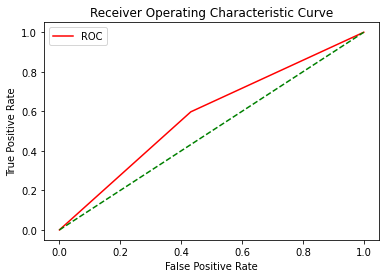

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

prediction=logreg.predict(X_test)

accu_lr=accuracy_score(Y_test , prediction)*100
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

prob = prediction
fper, tper, thresholds = roc_curve(Y_test, prob)
plot_roc_curve(fper, tper)


## Random Forest

Accuracy Score = 94.5
Confusion Matrix =
 [[387  23]
 [ 21 369]]
Classification Report =
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       410
           1       0.94      0.95      0.94       390

    accuracy                           0.94       800
   macro avg       0.94      0.95      0.94       800
weighted avg       0.95      0.94      0.95       800



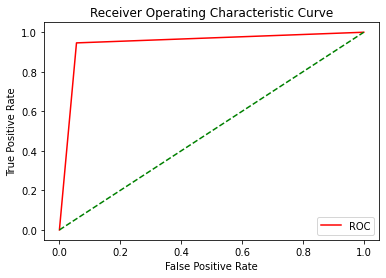

In [251]:
from sklearn.ensemble import RandomForestClassifier

rdf=RandomForestClassifier()
rdf.fit(X_train,Y_train)
pre_fit=rdf.predict(X_test)
accu_rf=accuracy_score(Y_test , pre_fit)*100

print(f"Accuracy Score = {accuracy_score(Y_test,pre_fit)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,pre_fit)}")
print(f"Classification Report =\n {classification_report(Y_test,pre_fit)}")

prob = pre_fit
fper, tper, thresholds = roc_curve(Y_test, prob)
plot_roc_curve(fper, tper)

## KNN

Accuracy Score = 69.25
Confusion Matrix =
 [[249 161]
 [ 85 305]]
Classification Report =
               precision    recall  f1-score   support

           0       0.75      0.61      0.67       410
           1       0.65      0.78      0.71       390

    accuracy                           0.69       800
   macro avg       0.70      0.69      0.69       800
weighted avg       0.70      0.69      0.69       800



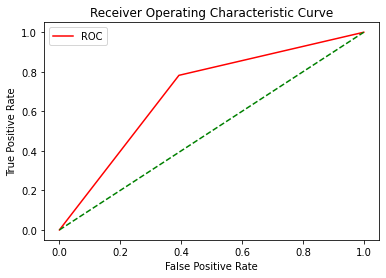

In [252]:
from sklearn.neighbors import KNeighborsClassifier


kne=KNeighborsClassifier()
kne.fit(X_train,Y_train)
pred_kne=kne.predict(X_test)
accu_kne=accuracy_score(Y_test , pred_kne)*100

print(f"Accuracy Score = {accuracy_score(Y_test,pred_kne)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,pred_kne)}")
print(f"Classification Report =\n {classification_report(Y_test,pred_kne)}")

prob = pred_kne
fper, tper, thresholds = roc_curve(Y_test, prob)
plot_roc_curve(fper, tper)

## SVC

Accuracy Score = 72.75
Confusion Matrix =
 [[278 132]
 [ 86 304]]
Classification Report =
               precision    recall  f1-score   support

           0       0.60      0.65      0.62       364
           1       0.69      0.64      0.66       436

    accuracy                           0.65       800
   macro avg       0.64      0.65      0.64       800
weighted avg       0.65      0.65      0.65       800



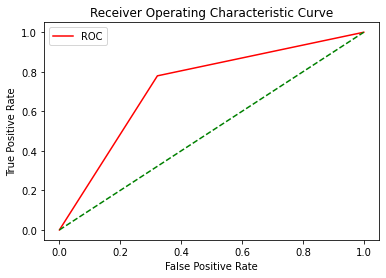

In [253]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
svc=SVC(probability=True)
svc.fit(X_train,Y_train)
pre_siv=svc.predict(X_test)

accu_svc=accuracy_score(Y_test , pre_siv)*100
print(f"Accuracy Score = {accuracy_score(Y_test,pre_siv)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,pre_siv)}")
print(f"Classification Report =\n {classification_report(pre_siv,prediction)}")

prob = pre_siv
fper, tper, thresholds = roc_curve(Y_test, prob)
plot_roc_curve(fper, tper)

In [254]:
probs_svc = svc.predict_proba(X_test)[:, 1]
probs_kne = kne.predict_proba(X_test)[:, 1]
probs_rdf = rdf.predict_proba(X_test)[:, 1]
probs_lr = logreg.predict_proba(X_test)[:, 1]



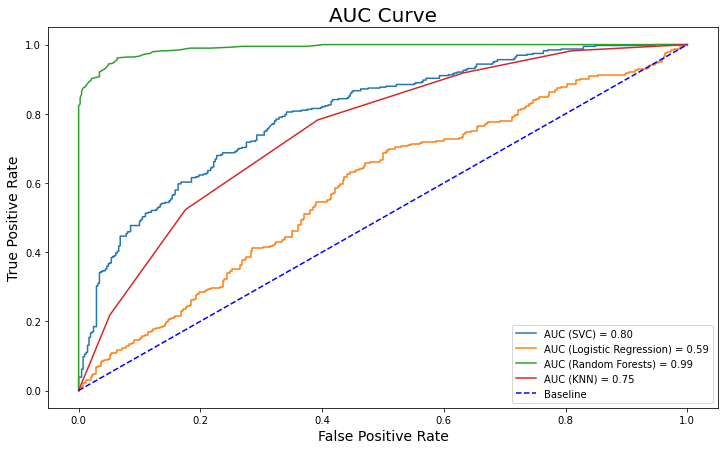

In [255]:
from sklearn.metrics import roc_auc_score, roc_curve,auc


fpr_svc, tpr_svc, thresholds_svc = roc_curve(Y_test, probs_svc)
auc_svc = auc(fpr_svc, tpr_svc)


fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, probs_lr)
auc_lr = auc(fpr_lr, tpr_lr)


fpr_rdf, tpr_rdf, thresholds_rdf = roc_curve(Y_test, probs_rdf)
auc_rdf = auc(fpr_rdf, tpr_rdf)



fpr_kne, tpr_kne, thresholds_kne = roc_curve(Y_test, probs_kne)
auc_kne = auc(fpr_kne, tpr_kne)

mplt.figure(figsize=(12, 7))
mplt.plot(fpr_svc, tpr_svc, label=f'AUC (SVC) = {auc_svc:.2f}')
mplt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
mplt.plot(fpr_rdf, tpr_rdf, label=f'AUC (Random Forests) = {auc_rdf:.2f}')
mplt.plot(fpr_kne, tpr_kne, label=f'AUC (KNN) = {auc_kne:.2f}')
mplt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
mplt.title('AUC Curve', size=20)
mplt.xlabel('False Positive Rate', size=14)
mplt.ylabel('True Positive Rate', size=14)
mplt.legend();

In [256]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','RandomForestClassifier','KNeighborsClassifier','SVC'],
    'Score': [ accu_lr,accu_rf, accu_kne, accu_svc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,RandomForestClassifier,94.50
3,SVC,72.75
2,KNeighborsClassifier,69.25
0,Logistic Regression,58.25


## Using Smote

In [257]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

### SVC

Accuracy Score = 72.75
Confusion Matrix =
 [[281 129]
 [ 89 301]]
Classification Report =
               precision    recall  f1-score   support

           0       0.61      0.64      0.62       370
           1       0.68      0.64      0.66       430

    accuracy                           0.64       800
   macro avg       0.64      0.64      0.64       800
weighted avg       0.64      0.64      0.64       800



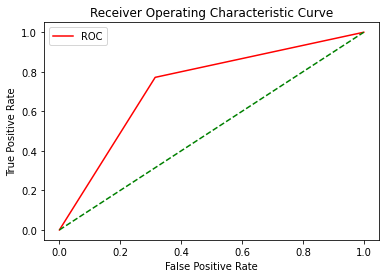

In [258]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
svc=SVC(probability=True)
svc.fit(X_train_res,Y_train_res)
pre_siv=svc.predict(X_test)

print(f"Accuracy Score = {accuracy_score(Y_test,pre_siv)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,pre_siv)}")
print(f"Classification Report =\n {classification_report(pre_siv,prediction)}")

prob = pre_siv
fper, tper, thresholds = roc_curve(Y_test, prob)
plot_roc_curve(fper, tper)



###  Logistic Regression

Accuracy Score = 57.99999999999999
Confusion Matrix =
 [[244 166]
 [170 220]]
Classification Report =
               precision    recall  f1-score   support

           0       0.59      0.60      0.59       410
           1       0.57      0.56      0.57       390

    accuracy                           0.58       800
   macro avg       0.58      0.58      0.58       800
weighted avg       0.58      0.58      0.58       800



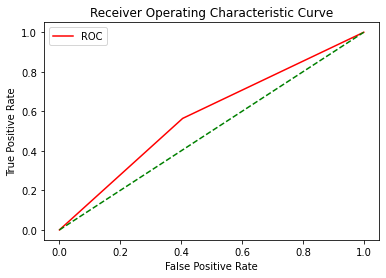

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg = LogisticRegression()
logreg.fit(X_train_res, Y_train_res)

prediction=logreg.predict(X_test)

accu_lr=accuracy_score(Y_test , prediction)*100
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

prob = prediction
fper, tper, thresholds = roc_curve(Y_test, prob)
plot_roc_curve(fper, tper)

### KNN 

Accuracy Score = 69.375
Confusion Matrix =
 [[250 160]
 [ 85 305]]
Classification Report =
               precision    recall  f1-score   support

           0       0.75      0.61      0.67       410
           1       0.66      0.78      0.71       390

    accuracy                           0.69       800
   macro avg       0.70      0.70      0.69       800
weighted avg       0.70      0.69      0.69       800



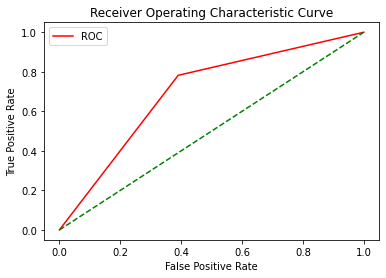

In [260]:
from sklearn.neighbors import KNeighborsClassifier


kne=KNeighborsClassifier()
kne.fit(X_train_res,Y_train_res)
pred_kne=kne.predict(X_test)
accu_kne=accuracy_score(Y_test , pred_kne)*100
print(f"Accuracy Score = {accuracy_score(Y_test,pred_kne)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,pred_kne)}")
print(f"Classification Report =\n {classification_report(Y_test,pred_kne)}")
probs_kne = kne.predict_proba(X_test)[:, 1]

prob = pred_kne
fper, tper, thresholds = roc_curve(Y_test, prob)
plot_roc_curve(fper, tper)


### Random Forest 

Accuracy Score = 94.75
Confusion Matrix =
 [[386  24]
 [ 18 372]]
Classification Report =
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       410
           1       0.94      0.95      0.95       390

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



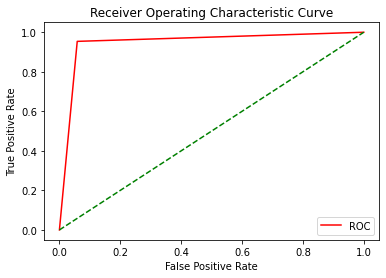

In [261]:
from sklearn.ensemble import RandomForestClassifier

rdf=RandomForestClassifier()
rdf.fit(X_train_res,Y_train_res)
pre_fit=rdf.predict(X_test)
accu_rf=accuracy_score(Y_test , pre_fit)*100
print(f"Accuracy Score = {accuracy_score(Y_test,pre_fit)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,pre_fit)}")
print(f"Classification Report =\n {classification_report(Y_test,pre_fit)}")

prob = pre_fit
fper, tper, thresholds = roc_curve(Y_test, prob)
plot_roc_curve(fper, tper)



In [262]:
probs_svc = svc.predict_proba(X_test)[:, 1]
probs_kne = kne.predict_proba(X_test)[:, 1]
probs_rdf = rdf.predict_proba(X_test)[:, 1]
probs_lr = logreg.predict_proba(X_test)[:, 1]


In [263]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','SVC'],
    'Score': [ accu_dt,accu_rf, accu_kne, accu_svc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,RandomForestClassifier,94.750
3,SVC,72.750
2,KNeighborsClassifier,69.375
0,DecisionTreeClassifier,53.500


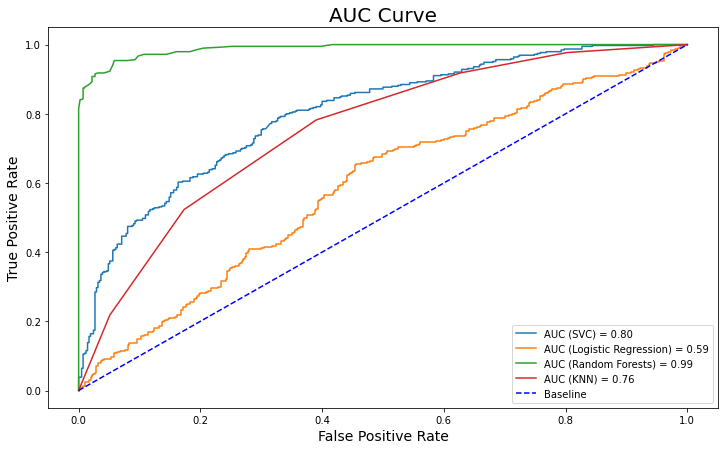

In [264]:
from sklearn.metrics import roc_auc_score, roc_curve,auc


fpr_svc, tpr_svc, thresholds_svc = roc_curve(Y_test, probs_svc)
auc_svc = auc(fpr_svc, tpr_svc)


fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, probs_lr)
auc_lr = auc(fpr_lr, tpr_lr)


fpr_rdf, tpr_rdf, thresholds_rdf = roc_curve(Y_test, probs_rdf)
auc_rdf = auc(fpr_rdf, tpr_rdf)



fpr_kne, tpr_kne, thresholds_kne = roc_curve(Y_test, probs_kne)
auc_kne = auc(fpr_kne, tpr_kne)

mplt.figure(figsize=(12, 7))
mplt.plot(fpr_svc, tpr_svc, label=f'AUC (SVC) = {auc_svc:.2f}')
mplt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
mplt.plot(fpr_rdf, tpr_rdf, label=f'AUC (Random Forests) = {auc_rdf:.2f}')
mplt.plot(fpr_kne, tpr_kne, label=f'AUC (KNN) = {auc_kne:.2f}')
mplt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
mplt.title('AUC Curve', size=20)
mplt.xlabel('False Positive Rate', size=14)
mplt.ylabel('True Positive Rate', size=14)
mplt.legend();